In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
a = pd.read_csv('test.csv')

In [3]:
models = []
acc = []
precision = []
recall = []
f1 = []

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [8]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [9]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

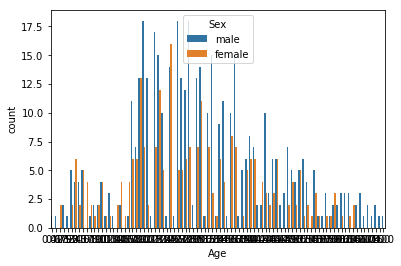

In [10]:
sns.countplot(x='Age',hue='Sex',data=df)

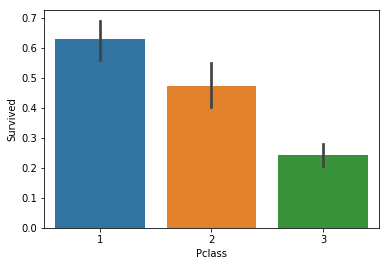

In [11]:
sns.barplot(x='Pclass',y='Survived',data=df)

In [12]:
# Data Preprocessing
df.drop(['Cabin'],axis=1,inplace=True)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
# Ordinal Encoding on Sex and Embarked
s = df['Embarked'].unique()
s

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
ord_dict = {}
i=0
for cat in s:
    ord_dict[cat] = i
    i = i+1
ord_dict

{'S': 0, 'C': 1, 'Q': 2, nan: 3}

In [16]:
df['Embarked_'] = df['Embarked'].map(ord_dict)

In [17]:
k = df['Sex'].unique()
k

array(['male', 'female'], dtype=object)

In [18]:
ord_dict = {}
i=0
for cat in k:
    ord_dict[cat] = i
    i = i+1
ord_dict

{'male': 0, 'female': 1}

In [19]:
df['Sex_'] = df['Sex'].map(ord_dict)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_,Sex_
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0


In [21]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_,Sex_
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0


In [23]:
df.drop(['Name'],axis=1,inplace=True)

In [24]:
data = [df,a]
for dataset in data: 
    mean = df['Age'].mean()
    std = df['Age'].std()
    i_nul = dataset['Age'].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = i_nul)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = df["Age"].astype(int)

In [25]:
df["Age"].isnull().sum()

0

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked_      891 non-null int64
Sex_           891 non-null int64
dtypes: float64(1), int32(1), int64(7), object(1)
memory usage: 62.7+ KB


In [27]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked_,Sex_
0,1,0,3,22,1,0,A/5 21171,7.2500,0,0
1,2,1,1,38,1,0,PC 17599,71.2833,1,1
2,3,1,3,26,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,35,1,0,113803,53.1000,0,1
4,5,0,3,35,0,0,373450,8.0500,0,0


In [28]:
df.drop(['Ticket'],axis=1,inplace=True)

In [29]:
data = [df,a]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [30]:
data = [df,a]

for dataset in data:
    dataset.loc[ dataset["Fare"] <= 7.5, ["Fare"]] = 0
    dataset.loc[(dataset["Fare"] > 7.5) & (dataset["Fare"] <= 15),["Fare"]] = 1
    dataset.loc[(dataset["Fare"] > 15) & (dataset["Fare"] <= 31),["Fare"]] = 2
    dataset.loc[(dataset["Fare"] > 31) & (dataset["Fare"] <= 99),["Fare"]] = 3
    dataset.loc[(dataset["Fare"] > 99) & (dataset["Fare"] <= 250),["Fare"]] = 4
    dataset.loc[ dataset["Fare"] > 250,["Fare"]] = 5
    dataset["Fare"] = dataset["Fare"].astype(int)

In [31]:
df["Fare"].isnull().sum()

0

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null int32
Embarked_      891 non-null int64
Sex_           891 non-null int64
dtypes: int32(2), int64(7)
memory usage: 55.7 KB


In [33]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_,Sex_
0,1,0,3,22,1,0,0,0,0
1,2,1,1,38,1,0,3,1,1
2,3,1,3,26,0,0,0,0,1
3,4,1,1,35,1,0,3,0,1
4,5,0,3,35,0,0,1,0,0


In [34]:
df.drop(['PassengerId'],axis=1,inplace=True)

In [35]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_',
       'Sex_'],
      dtype='object')

In [36]:
df.isnull().sum()

Survived     0
Pclass       0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked_    0
Sex_         0
dtype: int64

In [37]:
# Classification
# Standard Scaling
x = df.iloc[:,[1,2,3,4,5,6]].values
y = df.iloc[:,[0]].values

In [38]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,
                                                random_state = 0)

In [39]:
# Feature Selection
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [40]:
x_train_sc = sc.fit_transform(x_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [41]:
sc.mean_

array([ 2.30538922, 29.72005988,  0.53443114,  0.39221557,  1.50299401,
        0.36227545])

In [42]:
sc.var_

array([  0.7001506 , 182.12971736,   1.34761689,   0.67550826,
         1.56436229,   0.42863674])

In [43]:
x_test_sc = sc.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [44]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)

In [45]:
lr.fit(x_train_sc,y_train)
models.append('Logistic Regression')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
lr.intercept_

array([-0.52484749])

In [47]:
lr.coef_

array([[-0.69756651, -0.46440736, -0.30887701,  0.17701664,  0.24276114,
         0.32521617]])

In [48]:
lr.n_iter_

array([5], dtype=int32)

In [49]:
lr.predict(x_test_sc)

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [50]:
probs = lr.predict_proba(x_test_sc)

In [51]:
probs

array([[0.62070785, 0.37929215],
       [0.77167564, 0.22832436],
       [0.5506474 , 0.4493526 ],
       [0.18899345, 0.81100655],
       [0.59182319, 0.40817681],
       [0.28770902, 0.71229098],
       [0.36075851, 0.63924149],
       [0.21206311, 0.78793689],
       [0.24511779, 0.75488221],
       [0.65751398, 0.34248602],
       [0.83969096, 0.16030904],
       [0.69927926, 0.30072074],
       [0.66187826, 0.33812174],
       [0.28565701, 0.71434299],
       [0.19383069, 0.80616931],
       [0.7264954 , 0.2735046 ],
       [0.74885738, 0.25114262],
       [0.44614197, 0.55385803],
       [0.81838895, 0.18161105],
       [0.39865775, 0.60134225],
       [0.52168795, 0.47831205],
       [0.23299296, 0.76700704],
       [0.53023437, 0.46976563],
       [0.38717986, 0.61282014],
       [0.74233028, 0.25766972],
       [0.26539487, 0.73460513],
       [0.83150454, 0.16849546],
       [0.777682  , 0.222318  ],
       [0.47956628, 0.52043372],
       [0.63256876, 0.36743124],
       [0.

In [52]:
log_proba = lr.predict_log_proba(x_test_sc)
log_proba

array([[-0.47689475, -0.96944854],
       [-0.25919098, -1.47698801],
       [-0.5966606 , -0.79994741],
       [-1.6660429 , -0.20947915],
       [-0.52454736, -0.89605483],
       [-1.24580566, -0.33926877],
       [-1.01954648, -0.44747298],
       [-1.55087134, -0.23833729],
       [-1.40601641, -0.28119355],
       [-0.41928926, -1.07152443],
       [-0.17472135, -1.83065185],
       [-0.3577051 , -1.20157322],
       [-0.41267363, -1.08434928],
       [-1.25296344, -0.33639206],
       [-1.64077022, -0.2154615 ],
       [-0.31952313, -1.29643684],
       [-0.28920673, -1.38173429],
       [-0.80711805, -0.59084689],
       [-0.20041757, -1.70588795],
       [-0.91965201, -0.50859103],
       [-0.65068567, -0.73749193],
       [-1.45674704, -0.2652593 ],
       [-0.63443616, -0.75552137],
       [-0.94886595, -0.48968379],
       [-0.29796101, -1.35607667],
       [-1.32653649, -0.30842216],
       [-0.18451852, -1.78084648],
       [-0.25143757, -1.50364651],
       [-0.73487316,

In [53]:
# Evaluation Using Logistic Regression 
from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,
                            recall_score,f1_score)

In [54]:
print('Confusion Matrix of LR: \n',confusion_matrix(y_test,lr.predict(x_test_sc)))

Confusion Matrix of LR: 
 [[124  15]
 [ 40  44]]


In [55]:
print('Accuracy Score of LR: \n',accuracy_score(y_test,lr.predict(x_test_sc)))
acc.append(accuracy_score(y_test, lr.predict(x_test_sc)))
print('Precision Score of LR: \n',precision_score(y_test,lr.predict(x_test_sc)))
precision.append(precision_score(y_test, lr.predict(x_test_sc)))
print('Recall Score of LR: \n',recall_score(y_test,lr.predict(x_test_sc)))
recall.append(recall_score(y_test, lr.predict(x_test_sc)))
print('F1 Score of LR: \n',f1_score(y_test,lr.predict(x_test_sc)))
f1.append(f1_score(y_test, lr.predict(x_test_sc)))

Accuracy Score of LR: 
 0.7533632286995515
Precision Score of LR: 
 0.7457627118644068
Recall Score of LR: 
 0.5238095238095238
F1 Score of LR: 
 0.6153846153846153


In [56]:
# By Using SVM
from sklearn.svm import SVC
svc = SVC(kernel='rbf',random_state=0)
svc.fit(x_train_sc,y_train)
models.append('SVM')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
# Evaluation Using SVM
print('Confusion Matrix of SVM: \n',confusion_matrix(y_test,svc.predict(x_test_sc)))

Confusion Matrix of SVM: 
 [[121  18]
 [ 39  45]]


In [58]:
print('Accuracy of SVM: \n',accuracy_score(y_test,svc.predict(x_test_sc)))
acc.append(accuracy_score(y_test, svc.predict(x_test_sc)))

Accuracy of SVM: 
 0.7443946188340808


In [59]:
print('Precision of SVM: \n',precision_score(y_test,svc.predict(x_test_sc)))
precision.append(precision_score(y_test, svc.predict(x_test_sc)))

Precision of SVM: 
 0.7142857142857143


In [60]:
print('Recall of SVM: \n',recall_score(y_test,svc.predict(x_test_sc)))
recall.append(recall_score(y_test, svc.predict(x_test_sc)))

Recall of SVM: 
 0.5357142857142857


In [61]:
print('F1 of SVM: \n',f1_score(y_test,svc.predict(x_test_sc)))
f1.append(f1_score(y_test, svc.predict(x_test_sc)))

F1 of SVM: 
 0.6122448979591837


In [62]:
# By Using Decision Tree
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,
                           random_state=0)
dt.fit(x_train_sc,y_train)
models.append('Decision Tree')

In [64]:
# Evaluation Using Decision Tree
print('Confusion Matrix of DT: \n',confusion_matrix(y_test,dt.predict(x_test_sc)))

Confusion Matrix of DT: 
 [[110  29]
 [ 31  53]]


In [65]:
print('Accuracy Score of DT: \n',accuracy_score(y_test,dt.predict(x_test_sc)))
acc.append(accuracy_score(y_test, dt.predict(x_test_sc)))
print('Precision Score of DT: \n',precision_score(y_test,dt.predict(x_test_sc)))
precision.append(precision_score(y_test, dt.predict(x_test_sc)))
print('Recall Score of DT: \n',recall_score(y_test,dt.predict(x_test_sc)))
recall.append(recall_score(y_test, dt.predict(x_test_sc)))
print('F1 Score of DT: \n',f1_score(y_test,dt.predict(x_test_sc)))
f1.append(f1_score(y_test, dt.predict(x_test_sc)))

Accuracy Score of DT: 
 0.7309417040358744
Precision Score of DT: 
 0.6463414634146342
Recall Score of DT: 
 0.6309523809523809
F1 Score of DT: 
 0.6385542168674698


In [66]:
# By Using Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5,criterion='entropy',
                           random_state=0)
rf.fit(x_train_sc,y_train)
models.append('Random Forest')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [67]:
# Evaluation Using Random Forest Classification
print('Confusion Matrix of RF: \n',confusion_matrix(y_test,rf.predict(x_test_sc)))

Confusion Matrix of RF: 
 [[115  24]
 [ 36  48]]


In [68]:
print('Accuracy Score of RF: \n',accuracy_score(y_test,dt.predict(x_test_sc)))
acc.append(accuracy_score(y_test, rf.predict(x_test_sc)))
print('Precision Score of RF: \n',precision_score(y_test,dt.predict(x_test_sc)))
precision.append(precision_score(y_test, rf.predict(x_test_sc)))
print('Recall Score of RF: \n',recall_score(y_test,dt.predict(x_test_sc)))
recall.append(recall_score(y_test, rf.predict(x_test_sc)))
print('F1 Score of RF: \n',f1_score(y_test,dt.predict(x_test_sc)))
f1.append(f1_score(y_test, rf.predict(x_test_sc)))

Accuracy Score of RF: 
 0.7309417040358744
Precision Score of RF: 
 0.6463414634146342
Recall Score of RF: 
 0.6309523809523809
F1 Score of RF: 
 0.6385542168674698


In [69]:
# By Using AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator=dt,n_estimators=15,
                        algorithm = 'SAMME.R',random_state=40)
adb.fit(x_train_sc,y_train)
models.append('AdaBoost')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
# Evaluation Using AdaBoost Classifiation
print('Confusion Matrix of ADB: \n',confusion_matrix(y_test,adb.predict(x_test_sc)))

Confusion Matrix of ADB: 
 [[114  25]
 [ 37  47]]


In [71]:
print('Accuracy Score of ADB: \n',accuracy_score(y_test,adb.predict(x_test_sc)))
acc.append(accuracy_score(y_test, adb.predict(x_test_sc)))
print('Precision Score of ADB: \n',precision_score(y_test,adb.predict(x_test_sc)))
precision.append(precision_score(y_test, adb.predict(x_test_sc)))
print('Recall Score of ADB: \n',recall_score(y_test,adb.predict(x_test_sc)))
recall.append(recall_score(y_test, adb.predict(x_test_sc)))
print('F1 Score of ADB: \n',f1_score(y_test,adb.predict(x_test_sc)))
f1.append(f1_score(y_test, adb.predict(x_test_sc)))

Accuracy Score of ADB: 
 0.7219730941704036
Precision Score of ADB: 
 0.6527777777777778
Recall Score of ADB: 
 0.5595238095238095
F1 Score of ADB: 
 0.6025641025641025


In [72]:
models

['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'AdaBoost']

In [73]:
# Average Ensemble
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('Logistic Regression',lr),
                                 ('SVM',svc),
                                 ('Decison Tree',dt),
                                 ('Random Forest',rf),
                                 ('AdaBoost',adb)],
                     voting = 'hard')
vc.fit(x_train_sc,y_train)
models.append('Average Ensemble')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
# Evaluation Using Average Ensemble
print('Confusion Matrix of VC: \n',confusion_matrix(y_test,vc.predict(x_test_sc)))

Confusion Matrix of VC: 
 [[121  18]
 [ 35  49]]


In [75]:
print('Accuracy Score of ADB: \n',accuracy_score(y_test,vc.predict(x_test_sc)))
acc.append(accuracy_score(y_test,vc.predict(x_test_sc)))
print('Precision Score of ADB: \n',precision_score(y_test,vc.predict(x_test_sc)))
precision.append(precision_score(y_test,vc.predict(x_test_sc)))
print('Recall Score of ADB: \n',recall_score(y_test,vc.predict(x_test_sc)))
recall.append(recall_score(y_test,vc.predict(x_test_sc)))
print('F1 Score of ADB: \n',f1_score(y_test,vc.predict(x_test_sc)))
f1.append(f1_score(y_test,vc.predict(x_test_sc)))

Accuracy Score of ADB: 
 0.7623318385650224
Precision Score of ADB: 
 0.7313432835820896
Recall Score of ADB: 
 0.5833333333333334
F1 Score of ADB: 
 0.6490066225165563


In [76]:
acc

[0.7533632286995515,
 0.7443946188340808,
 0.7309417040358744,
 0.7309417040358744,
 0.7219730941704036,
 0.7623318385650224]

In [77]:
precision

[0.7457627118644068,
 0.7142857142857143,
 0.6463414634146342,
 0.6666666666666666,
 0.6527777777777778,
 0.7313432835820896]

In [78]:
f1

[0.6153846153846153,
 0.6122448979591837,
 0.6385542168674698,
 0.6153846153846153,
 0.6025641025641025,
 0.6490066225165563]

In [79]:
model_dict = {'Models': models,
             'Accuracies': acc,
             'Precision': precision,
             'Recall': recall,
             'F1': f1}

In [80]:
model_df = pd.DataFrame(model_dict)
model_df

,Models,Accuracies,Precision,Recall,F1
0,Logistic Regression,0.753363,0.745763,0.523810,0.615385
1,SVM,0.744395,0.714286,0.535714,0.612245
2,Decision Tree,0.730942,0.646341,0.630952,0.638554
3,Random Forest,0.730942,0.666667,0.571429,0.615385
4,AdaBoost,0.721973,0.652778,0.559524,0.602564
5,Average Ensemble,0.762332,0.731343,0.583333,0.649007


In [81]:
model_df = model_df.sort_values(['Accuracies','F1','Recall','Precision'],ascending=False)
model_df

,Models,Accuracies,Precision,Recall,F1
5,Average Ensemble,0.762332,0.731343,0.583333,0.649007
0,Logistic Regression,0.753363,0.745763,0.523810,0.615385
1,SVM,0.744395,0.714286,0.535714,0.612245
2,Decision Tree,0.730942,0.646341,0.630952,0.638554
3,Random Forest,0.730942,0.666667,0.571429,0.615385
4,AdaBoost,0.721973,0.652778,0.559524,0.602564


In [82]:
# Selection of Best Model
best_model = model_df['Models'].values[0]

In [83]:
best_model

'Average Ensemble'

In [84]:
# Hyper Parameter Tuning
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lr,
                            X = x_train_sc,
                            y = y_train,
                            cv = 10)
acMean = accuracies.mean()
acStd = accuracies.std()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

In [85]:
acMean

0.705088195386703

In [86]:
acStd

0.04063998562083561

In [87]:
accuracies

array([0.6119403 , 0.70149254, 0.76119403, 0.70149254, 0.71641791,
       0.68656716, 0.76119403, 0.70149254, 0.72727273, 0.68181818])

In [90]:
# Applying for GridSearch
from sklearn.model_selection import GridSearchCV
parameters =  {"n_estimators": [3,5,10],   # you can use any numbers, it wouldnt be affect the final result. no of decision trees.
              "criterion":['gini','entropy'],
              "max_depth": [2,3,5],     # Here you can use any numbers but if more depth then it takes more time for output.
              "min_samples_split": [10, 20, 30],
              "min_samples_leaf": [1, 5, 15],
              "min_weight_fraction_leaf": [0.1, 0.05, 0.005]}
grid_search = GridSearchCV(estimator=rf,
                          param_grid= parameters,
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(x_train_sc,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [91]:
best_accuracy = grid_search.best_score_

In [92]:
best_accuracy

0.7065868263473054

In [93]:
best_parameters = grid_search.best_params_

In [94]:
best_parameters

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.005,
 'n_estimators': 5}

In [95]:
# Making a new model on the basis of grid_search
from sklearn.ensemble import RandomForestClassifier
TuneRF = RandomForestClassifier(n_estimators = best_parameters["n_estimators"],
                                 criterion = best_parameters["criterion"],
                                 max_depth = best_parameters["max_depth"],
                                 min_samples_split = best_parameters["min_samples_split"],
                                 min_samples_leaf = best_parameters["min_samples_leaf"],
                                 min_weight_fraction_leaf = best_parameters["min_weight_fraction_leaf"])
TuneRF.fit(x_train_sc,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.005, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
# Evaluation using TuneRF model
print('Confusion Matrix of TuneRF: \n',confusion_matrix(y_test,TuneRF.predict(x_test_sc)))

Confusion Matrix of TuneRF: 
 [[121  18]
 [ 36  48]]


In [97]:
print('Accuracy Score of TuneRF: \n',accuracy_score(y_test,TuneRF.predict(x_test_sc)))
print('Precision Score of TuneRF: \n',precision_score(y_test,TuneRF.predict(x_test_sc)))
print('Recall Score of TuneRF: \n',recall_score(y_test,TuneRF.predict(x_test_sc)))
print('f1 Score of TuneRF: \n',f1_score(y_test,TuneRF.predict(x_test_sc)))

Accuracy Score of TuneRF: 
 0.757847533632287
Precision Score of TuneRF: 
 0.7272727272727273
Recall Score of TuneRF: 
 0.5714285714285714
f1 Score of TuneRF: 
 0.64
